In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from config import *
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_X, train_Y = read_training_set()
test_X = read_test_set()

In [3]:
print('train_X.shape =', train_X.shape)
print('train_Y.shape =', train_Y.shape)
print('test_X.shape =', test_X.shape)

train_X.shape = (42000, 784)
train_Y.shape = (42000, 10)
test_X.shape = (28000, 784)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


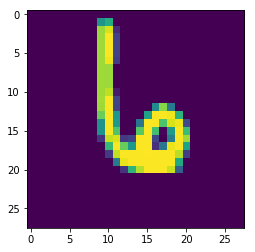

In [4]:
print(train_Y[123])
plot_image(train_X[123])

In [5]:
# preprocessing
train_X = train_X / 255
test_X = test_X / 255

In [6]:
# v2 model
# apply deeper net
# apply batch norm
model = Sequential()

model.add(Dense(units=256, input_dim=HEIGHT*WIDTH))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=CLASS_NUM))
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
__________

In [ ]:
# train model
model.fit(train_X, train_Y, batch_size=256, epochs=64, verbose=2)

Epoch 1/64
 - 5s - loss: 1.1909 - acc: 0.6242
Epoch 2/64
 - 2s - loss: 0.5434 - acc: 0.8475
Epoch 3/64
 - 2s - loss: 0.4157 - acc: 0.8844
Epoch 4/64
 - 2s - loss: 0.3589 - acc: 0.9010
Epoch 5/64
 - 2s - loss: 0.3121 - acc: 0.9142
Epoch 6/64
 - 2s - loss: 0.2798 - acc: 0.9234
Epoch 7/64
 - 2s - loss: 0.2566 - acc: 0.9286
Epoch 8/64
 - 2s - loss: 0.2387 - acc: 0.9357
Epoch 9/64
 - 2s - loss: 0.2230 - acc: 0.9402
Epoch 10/64
 - 2s - loss: 0.2035 - acc: 0.9443
Epoch 11/64
 - 2s - loss: 0.1907 - acc: 0.9475
Epoch 12/64
 - 2s - loss: 0.1827 - acc: 0.9516
Epoch 13/64
 - 2s - loss: 0.1740 - acc: 0.9529
Epoch 14/64
 - 2s - loss: 0.1757 - acc: 0.9527
Epoch 15/64
 - 3s - loss: 0.1648 - acc: 0.9549
Epoch 16/64
 - 3s - loss: 0.1483 - acc: 0.9598
Epoch 17/64
 - 3s - loss: 0.1509 - acc: 0.9596
Epoch 18/64
 - 3s - loss: 0.1478 - acc: 0.9605
Epoch 19/64
 - 3s - loss: 0.1356 - acc: 0.9631
Epoch 20/64
 - 4s - loss: 0.1310 - acc: 0.9643
Epoch 21/64
 - 2s - loss: 0.1308 - acc: 0.9650
Epoch 22/64
 - 3s - lo

In [ ]:
# make prediction
preds = model.predict(test_X)
preds = np.argmax(preds, axis=1)

In [ ]:
preds[1234]

In [ ]:
plot_image(test_X[1234])

In [ ]:
# output file
write_predictions(preds)